In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [5]:
df = pd.read_csv(DATA_URL + "adult.data.csv")

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# 1.How many men and women (sex feature) are represented in this dataset?

In [17]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [18]:
# 2. What is the average age (age feature) of women?

In [22]:
df[df['sex'] == 'Female'].mean()

age                   36.858230
fnlwgt            185746.311206
education-num         10.035744
capital-gain         568.410547
capital-loss          61.187633
hours-per-week        36.410361
dtype: float64

In [23]:
# 3. What is the percentage of German citizens (native-country feature)?

In [34]:
df['native-country'].value_counts(normalize = True)['Germany'] * 100

0.42074874850281013

In [36]:
# 4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) 
#      and those who earn less than 50K per year?

In [57]:
df[df['salary'] == '>50K'].describe()['age']['mean'], df[df['salary'] == '>50K'].describe()['age']['std']

(44.24984058155847, 10.51902771985177)

In [133]:
df[df['salary'] == '<=50K'].describe()['age']['mean'], df[df['salary'] == '<=50K'].describe()['age']['std']

(36.78373786407767, 14.020088490824813)

In [59]:
# 6. Is it true that people who earn more than 50K have at least high school education? 
#   (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [64]:
df[df['salary'] == '>50K']['education'].unique()
#non-true

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

In [65]:
# 7. Display age statistics for each race (race feature) and each gender (sex feature). 
#    Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [71]:
df.groupby(['race'])['age'].describe()
#82

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


In [72]:
# 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men 
#   (marital-status feature)? Consider as married those who have a marital-status starting with Married 
#   (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [85]:
pd.crosstab(df['salary'], df['marital-status'])

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
salary,,,,,,,
<=50K,3980,13,8284,384,10192,959,908
>50K,463,10,6692,34,491,66,85


<AxesSubplot:xlabel='salary', ylabel='count'>

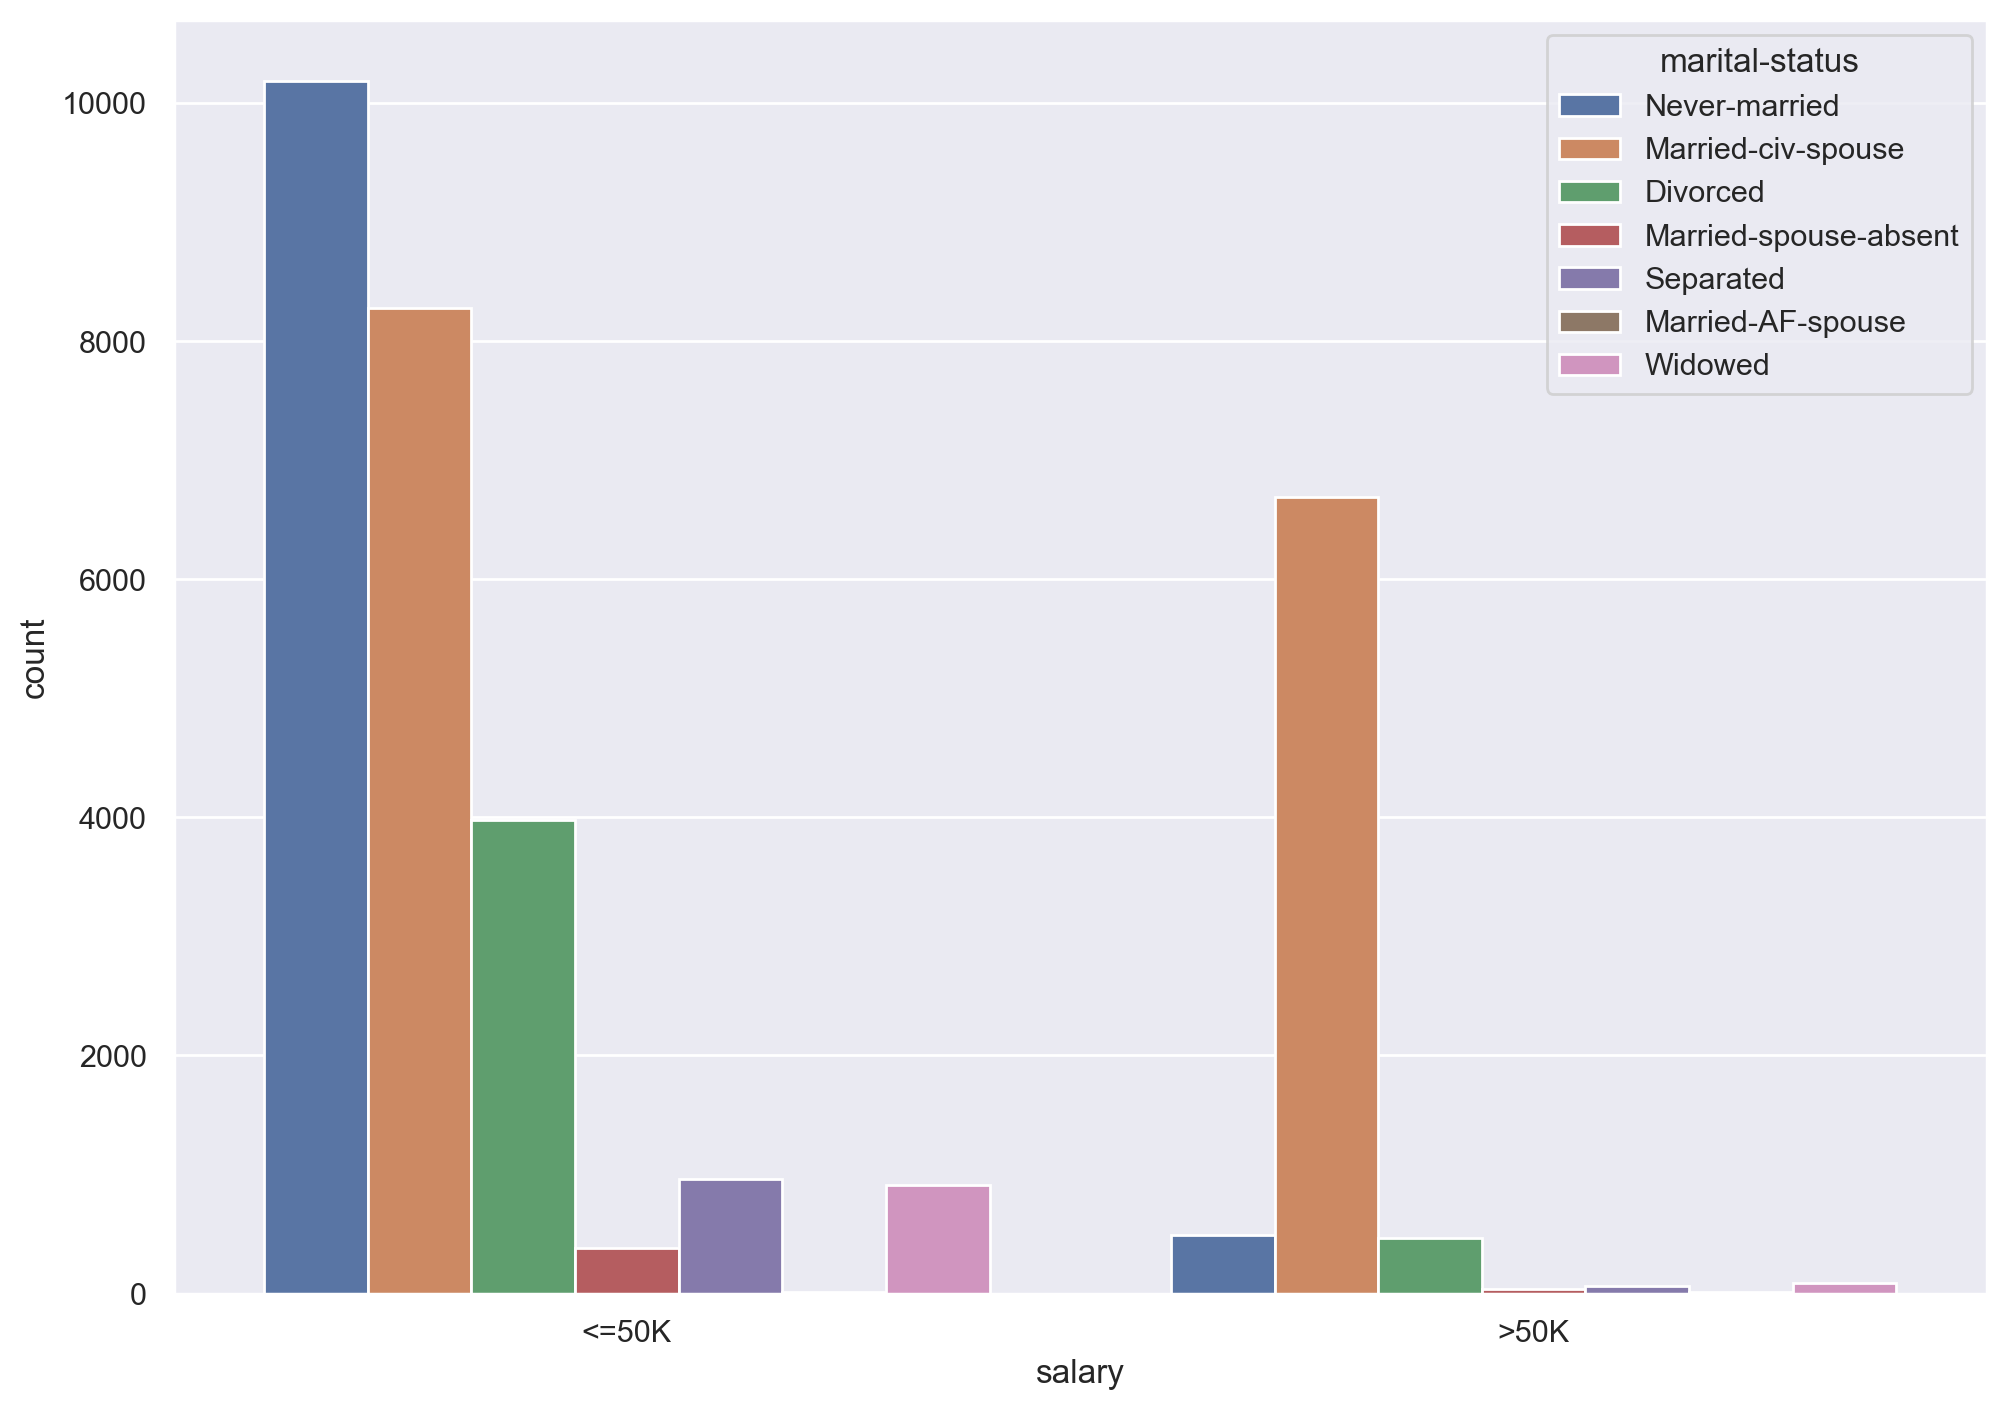

In [96]:
%config InlineBackend.figure_format = 'retina'
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x  = 'salary', hue = 'marital-status', data = df)
#married

In [97]:
# 9. What is the maximum number of hours a person works per week (hours-per-week feature)? 
# How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [100]:
df['hours-per-week'].describe()['max']

99.0

In [107]:
len(df[df['hours-per-week'] == 99])

85

In [114]:
df[df['hours-per-week'] == 99]['salary'].value_counts(normalize = True)['>50K'] * 100

29.411764705882355

In [115]:
# 10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) 
# for each country (native-country). What will these be for Japan?

In [137]:
pd.crosstab(
    df['native-country'],
    df['salary'],
    values = df['hours-per-week'],
    aggfunc = np.average
).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,39.139785,41.809524,39.360656,36.325,40.0,34.333333,39.142857,31.3,38.233333,41.44,40.947368,39.625,38.239437,41.000000,40.375,40.003279,36.09375,41.857143,35.068966,38.065693,38.166667,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,44.977273,50.625000,36.666667,42.750,NaN,60.000000,45.000000,50.0,46.475000,47.50,48.000000,45.400,41.100000,47.958333,40.000,46.575758,37.50000,NaN,40.000000,43.032787,39.000000,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5
